# KDD'99 Statistical Analysis
**Links:**\
[KDD Cup 1999 Data](https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)\
[KDD Detailed Analysis](https://www.ee.torontomu.ca/~bagheri/papers/cisda.pdf)

**Purpose:**\
The KDD'99 dateset was created as part of the DARPA 1998 Intrusion Detection Evaluation Program and originally used for the KDD Cup 1999 competition, where the aim as to build intrusion detection systems.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import io
from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

# Define columns
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", 
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", 
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", 
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", 
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", 
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", 
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

# Load .gz file into dataframe for evaluation
file_path = "Dataset/kddcup.data.gz"
df = pd.read_csv(file_path, names=column_names)

## Dataset Information Table

In [2]:
# Create a custom dataset information table
dataset_info = pd.DataFrame({
    "Column": df.columns,
    "Non-Null Count": df.count().values,
    "Data Type": df.dtypes.astype(str).values
})

display(dataset_info.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

,Column,Non-Null Count,Data Type
0,duration,4898431,int64
1,protocol_type,4898431,object
2,service,4898431,object
3,flag,4898431,object
4,src_bytes,4898431,int64
5,dst_bytes,4898431,int64
6,land,4898431,int64
7,wrong_fragment,4898431,int64
8,urgent,4898431,int64
9,hot,4898431,int64


## Numerical Feature Evaluation

In [3]:
display(df.describe().style.background_gradient(cmap='viridis').format("{:.2f}"))

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00,4898431.00
mean,48.34,1834.62,1093.62,0.00,0.00,0.00,0.01,0.00,0.14,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,334.97,295.27,0.18,0.18,0.06,0.06,0.79,0.02,0.03,232.98,189.21,0.75,0.03,0.61,0.01,0.18,0.18,0.06,0.06
std,723.33,941431.07,645012.33,0.00,0.04,0.01,0.47,0.01,0.35,3.86,0.01,0.01,3.94,0.12,0.01,0.04,0.00,0.00,0.03,211.99,245.99,0.38,0.38,0.23,0.23,0.39,0.08,0.14,64.02,105.91,0.41,0.11,0.48,0.04,0.38,0.38,0.23,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,45.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,121.00,10.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,49.00,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,520.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,510.00,510.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,255.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,1032.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,511.00,511.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,255.00,255.00,1.00,0.04,1.00,0.00,0.00,0.00,0.00,0.00
max,58329.00,1379963888.00,1309937401.00,1.00,3.00,14.00,77.00,5.00,1.00,7479.00,1.00,2.00,7468.00,43.00,2.00,9.00,0.00,1.00,1.00,511.00,511.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,255.00,255.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Protocol Type Distribution

In [4]:
# Convert Protocol Type Distribution to a DataFrame and display as a styled table
protocol_counts = df['protocol_type'].value_counts().reset_index()
protocol_counts.columns = ['Protocol Type', 'Count']
display(protocol_counts.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

,Protocol Type,Count
0,icmp,2833545
1,tcp,1870598
2,udp,194288


## Attack Type Distribution

In [9]:
# Convert Attack Type Distribution to a DataFrame and display as a styled table
attack_counts = df['label'].value_counts().reset_index()
attack_counts.columns = ['Attack Type', 'Count']
display(attack_counts.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

,Attack Type,Count
0,smurf.,2807886
1,neptune.,1072017
2,normal.,972781
3,satan.,15892
4,ipsweep.,12481
5,portsweep.,10413
6,nmap.,2316
7,back.,2203
8,warezclient.,1020
9,teardrop.,979


## Correlation Heatmap

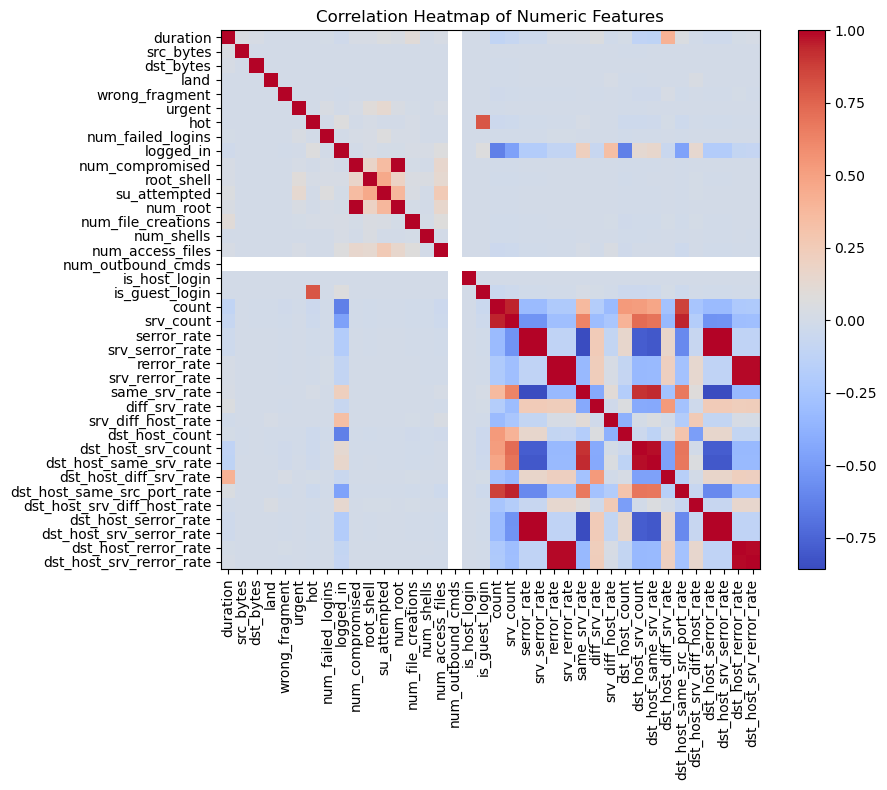

In [7]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## Attack Frequency Bar Chart

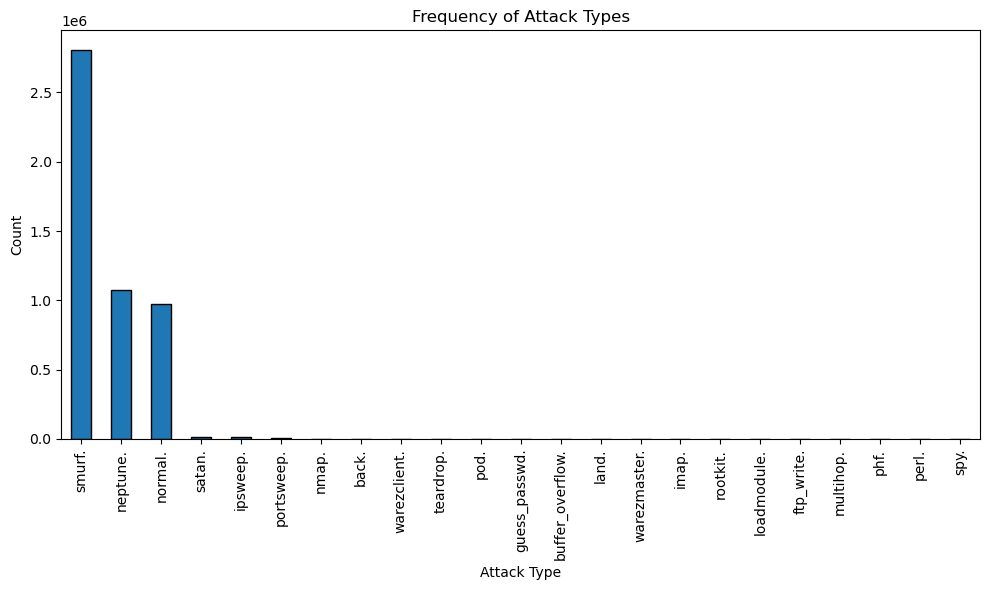

In [11]:
# Plot bar chart for attack type frequencies
plt.figure(figsize=(10, 6))
df['label'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Frequency of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()